### import list

In [236]:
import unittest # for unit tests and test driven development
from unittest import mock # for simulating user inputs
import cv2 # for manipultaing photos
import os # for finding available photos
from matplotlib import pyplot as plt # for showing photos to the user
# import numpy as np # for synthetically making photos
# will need PIL from the Image module for changing colors


In [ ]:
def make_vertically_long_border(photo, 
                                thickness = 1,
                                number_coresponding_gray = 150
                                ):
  import numpy as np

  height = photo.shape[0] #here
  width = thickness #and flip height and width/s asignment parameters

  blank_image = np.zeros((height, width, 3), np.uint8)
  
  #color it to be the corresponding gray in the keyword argument
  blank_image.fill(number_coresponding_gray)
  matching_vertical_border = blank_image

  return matching_vertical_border

def make_horizontally_long_border(photo, 
                                thickness = 10,
                                number_coresponding_gray = 150
                                ):
  import numpy as np

  height =  thickness
  width = photo.shape[1] 

  blank_image = np.zeros((height, width, 3), np.uint8)
  
  #color it to be the corresponding gray in the keyword argument
  blank_image.fill(number_coresponding_gray)
  matching_horizontal_border = np.array(blank_image, dtype = 'uint8')
  

  return matching_horizontal_border


In [ ]:
import os
import cv2

class PhotoStorage():
  def __init__(self, path) -> None:
    self.path_to_photo = path
    self.original_photo = cv2.imread(path)
    self.squared_photo = []

  # photo grafting
  def add_width_to_photo(self, additional_photo_width):
      horizontal_compensation = make_vertically_long_border(self.original_photo,
                                  thickness = additional_photo_width)
      new_photo = cv2.hconcat([self.original_photo,
                              horizontal_compensation])
      return new_photo

  def add_height_to_photo(self, how_much_height):
      vertical_compensation = make_horizontally_long_border(self.original_photo,
                                  thickness = how_much_height)
      new_photo = cv2.vconcat([self.original_photo,
                               vertical_compensation])
      return new_photo

  def make_a_photo_square_by_adding_blank_space(self):
    original_dimensions = self.original_photo.shape
    vertical = original_dimensions[0]
    horizontal = original_dimensions[1]
    if vertical == horizontal:
      squared_photo = self.original_photo

    elif vertical > horizontal:
      # get a photo to append to the bottom to make up for the disparity
      additional_photo_width = vertical - horizontal
      # append to the bottom
      squared_photo = self.add_width_to_photo(additional_photo_width)

    elif vertical < horizontal:
      additional_photo_height = horizontal - vertical
      squared_photo = self.add_height_to_photo(how_much_height=additional_photo_height)

    self.squared_photo = squared_photo


# class FolderManager():
#   def __init__(self) -> None:
#     pass
def available_files_in_folder(path):
    dir_lst = os.listdir(path)
    return dir_lst


### tests

In [237]:
import unittest
import os

class TestPhotoLoadedIn(unittest.TestCase):
  def setUp(self):
    self.path_to_glacier = "test_photos\glacier_photo\public_domain_glacier_mountains.jpg"
    self.photo_of_glacier = cv2.imread(self.path_to_glacier)
    self.photos_in_test_folder = os.listdir("test_photos\glacier_photo")
    self.Storage = PhotoStorage(self.path_to_glacier)
    # self.FolderTestClass = FolderManager()

  def test_retreives_a_list_of_all_files_in_a_folder(self):
    self.assertEqual(available_files_in_folder(path = "test_photos\glacier_photo"), 
                     ['public_domain_glacier_mountains.jpg'])

  def test_glacier_photo_is_in_test_photos_folder(self):
    self.assertIn('public_domain_glacier_mountains.jpg', 
                  self.photos_in_test_folder)

  def test_original_photo_is_stored_upon_class_creation(self):
    self.assertIn(self.Storage.original_photo,
                     self.photo_of_glacier)




In [256]:
class TestPhotoIsSquared(unittest.TestCase):
  # def __init__(self) -> None:
  #   pass
  
  def setUp(self):
    self.path_to_glacier = "test_photos/glacier_photo/public_domain_glacier_mountains.jpg"
    self.photo_of_glacier = cv2.imread(self.path_to_glacier)
    self.Storage = PhotoStorage(self.path_to_glacier)
    self.photo_of_glacier_squared = self.Storage.make_a_photo_square_by_adding_blank_space()

    self.how_wide = 2
    self.horizontal_compensation = make_vertically_long_border(self.photo_of_glacier, 
                                thickness = self.how_wide)
    self.how_tall = 2
    self.vertical_compensation = make_horizontally_long_border(self.photo_of_glacier, 
                                thickness = self.how_tall)


  def test_horizontal_compensation_is_as_tall_as_the_original_photo(self):
    self.assertEqual(self.horizontal_compensation.shape[0], 
                     self.photo_of_glacier.shape[0]) 
    # array([], shape=(750, , 3), dtype=uint8)

  def test_vertical_compensation_is_as_wide_as_the_original_photo(self):
    self.assertEqual(self.vertical_compensation.shape[1], 
                     self.photo_of_glacier.shape[1]) 

  def test_width_of_border_is_what_was_input(self):
    self.assertEqual(self.horizontal_compensation.shape[1],
                     self.how_wide)
  def test_height_is_as_input(self):
    self.assertEqual(self.vertical_compensation.shape[0], 
                     self.how_tall)
  # def test_horizontal_compensation_is_equal_to_the_difference_between_photo_being_square(self):
  #   failing test
  # def test_vertical_compensation_is_equal_to_the_difference_between_photo_being_square(self):
  #   failing test
  def test_height_change_of_vertical_photo_graft(self):
    self.assertEqual((self.photo_of_glacier.shape[0] + 1),
                     self.Storage.add_height_to_photo(1).shape[0],
                     )

  def test_make_photo_square(self):
    "this is to prevent distortion in the end result"
    print(self.Storage.squared_photo.shape)
    self.assertEqual(self.Storage.squared_photo.shape[0], 
                     self.Storage.squared_photo.shape[1])



In [ ]:
class GetFromUser():
  def __init__(self) -> None:
    pass
  def get_gauge_from_user(self) -> tuple:
    print("how many stitches(horizontal)?")
    horizontal = input(int())
    print("how many rows(vertical)?")
    vertical = input(int())
    gauge = (vertical, horizontal)
    return gauge


In [ ]:
@mock.patch(module_name, create = True) # handling user inputs

class TestBreakApartPhoto(unittest.TestCase):
  def __init__(self, methodName: str = "runTest") -> None:
    pass
  def setUp(self):
    self.path_to_glacier = "test_photos\glacier_photo\public_domain_glacier_mountains.jpg"
    self.Storage = PhotoStorage(self.path_to_glacier)
    self.gauge = (40, 18)
    mocked_input.side_effect = ["40", "18"]

  
  def test_is_a_pair_of_integers_input(self):
    # get_gauge_from_user function. , 
    # synthetic user input
    self.assertTupleEqual(input_gauge(),
                          self.gauge)
  
  # def test_size_is_as_parametered(self):
  def test_photo_crop_is_correct_dimensions(self):
   vertical = self.gauge[1]
   horizontal = self.gauge[0]
   crop_a_photo(of_image, )


In [ ]:
def crop_a_photo(of_image, psuedo_pixel_size, x_start = 0, y_start = 0):
  the_chunk = of_image[x_start : x_start + psuedo_pixel_size[0],
                       y_start : y_start + psuedo_pixel_size[1]]
  return the_chunk

def break_apart(photo, pieces_horizontal, pieces_vertical):
  blank = []
  for yy in range(pieces_vertical):
    for xx in enumerate(range(pieces_horizontal)):
      blank += crop_a_photo()
  return


In [258]:
def main():
    unittest.main(argv = [''], verbosity = 0, exit = False)

if __name__ == "__main__":
    main()


----------------------------------------------------------------------
Ran 9 tests in 0.216s

OK


(1000, 1000, 3)


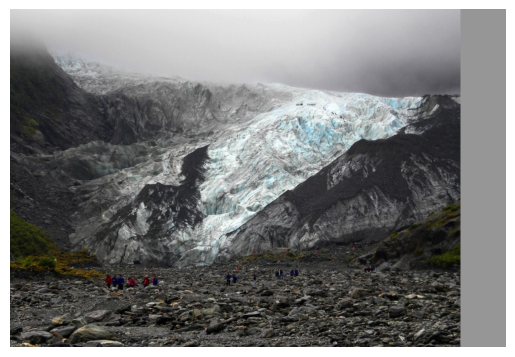

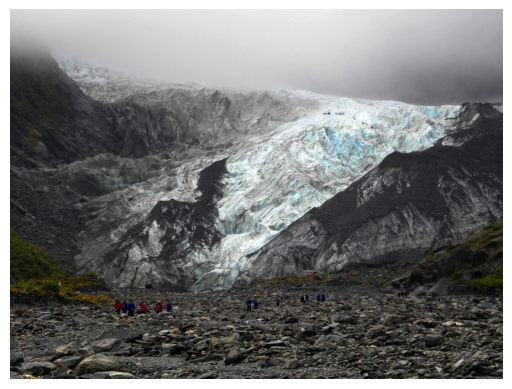

In [259]:
example = PhotoStorage("test_photos\glacier_photo\public_domain_glacier_mountains.jpg")
type(example.original_photo)
added = example.add_width_to_photo(101)
# example.make_a_photo_square_by_adding_blank_space()


from matplotlib import pyplot as plt
def show_photo(photo):
  plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show() # Display the newly cropped image



show_photo(added)
show_photo(example.original_photo)

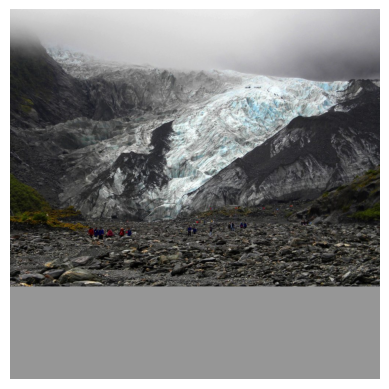

In [263]:
import cv2

path = "test_photos\glacier_photo\public_domain_glacier_mountains.jpg"
photo = cv2.imread(path)
example.make_a_photo_square_by_adding_blank_space()
show_photo(example.squared_photo)

